In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


## Create SQLite database for querying

Initially, skip any indexing/organizing and just write out as scans

In [2]:
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1.sqlite")

'../demo_data/180205_Poo_TruePoo_Full1.sqlite'

In [2]:
# Call your function with ordered=True to create the index
turn_mzml_sqlite('../demo_data/180205_Poo_TruePoo_Full1.mzML', '../demo_data/180205_Poo_TruePoo_Full1.sqlite', ordered=True)
import sqlite3

def test_indexing(db_file):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_file)
    
    # Check if the index exists
    print("Checking if the index exists...")
    index_list = conn.execute("PRAGMA index_list('MS1')").fetchall()
    
    if index_list:
        print("Indexes in MS1 table:")
        for index in index_list:
            print(f"Index: {index[1]}")  # The second element is the index name
    else:
        print("No indexes found in MS1 table.")
    
    # Optionally, test index performance with a query
    print("\nTesting the performance of a query using the mz index:")
    query = "SELECT * FROM MS1 WHERE mz BETWEEN 200 AND 300"
    cursor = conn.execute(query)
    rows = cursor.fetchall()
    print(f"Found {len(rows)} rows.")
    
    # Close the connection
    conn.close()

# Call the function with the path to your SQLite database file
test_indexing('../demo_data/180205_Poo_TruePoo_Full1.sqlite')


Checking if the index exists...
Indexes in MS1 table:
Index: idx_rt
Index: idx_int
Index: idx_mz

Testing the performance of a query using the mz index:
Found 338116 rows.


## Query the database

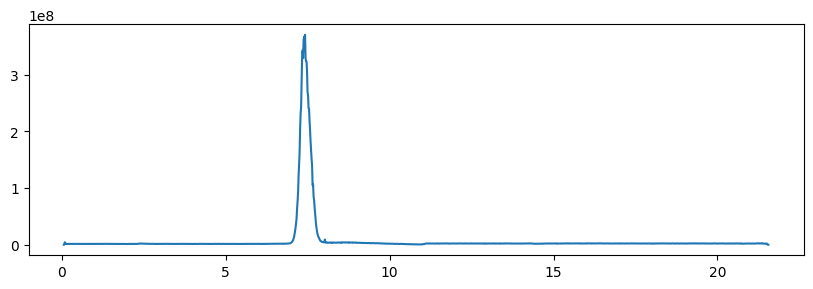

In [6]:
chrom_data = get_chrom_sqlite("../demo_data/180205_Poo_TruePoo_Full1.sqlite", 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

<StemContainer object of 3 artists>

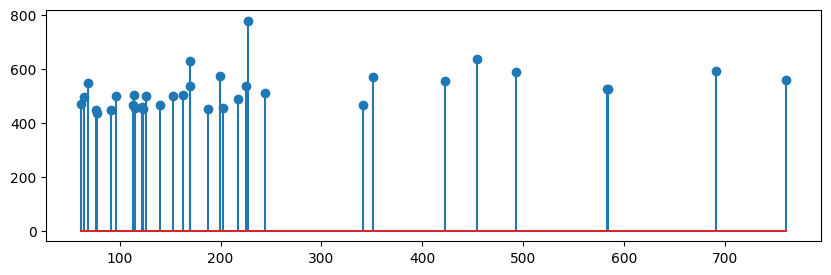

In [7]:
spec_data = get_spec_sqlite("../demo_data/180205_Poo_TruePoo_Full1.sqlite", 1)
plt.stem(spec_data["mz"], spec_data["int"])

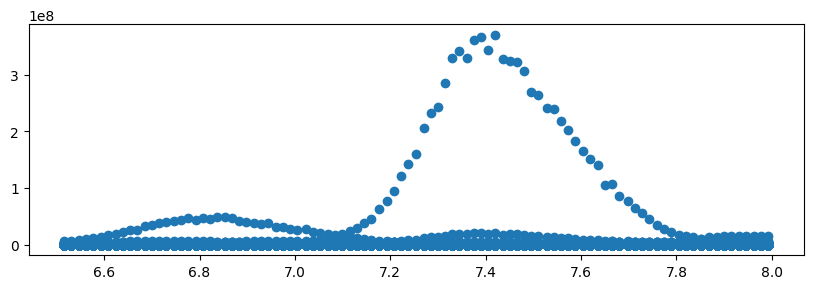

In [8]:
rtrange_data = get_rtrange_sqlite('../demo_data/180205_Poo_TruePoo_Full1.sqlite', 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

## Comparison to mzML methods

In [9]:
import timeit

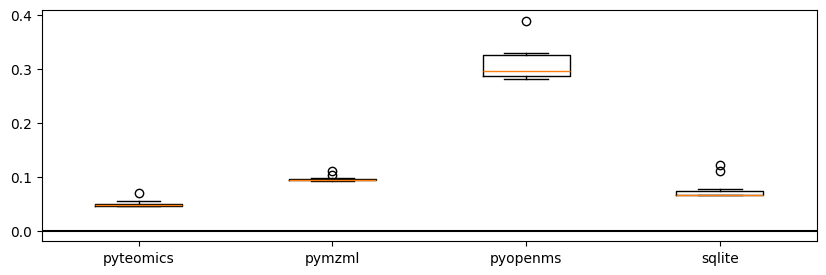

In [10]:
pyteomics_spec = timeit.repeat('get_spec_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)
pymzml_spec = timeit.repeat('get_spec_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1.mzML", 3)', globals=globals(), number=1, repeat=10)
pyopenms_spec = timeit.repeat('get_spec_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)
sqlite_spec = timeit.repeat('get_spec_sqlite("../demo_data/180205_Poo_TruePoo_Full1.sqlite", 1)', globals=globals(), number=1, repeat=10)
plt.boxplot([pyteomics_spec, pymzml_spec, pyopenms_spec, sqlite_spec], tick_labels=["pyteomics", "pymzml", "pyopenms", "sqlite"])
plt.axhline(y=0, color="k")
plt.show()

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


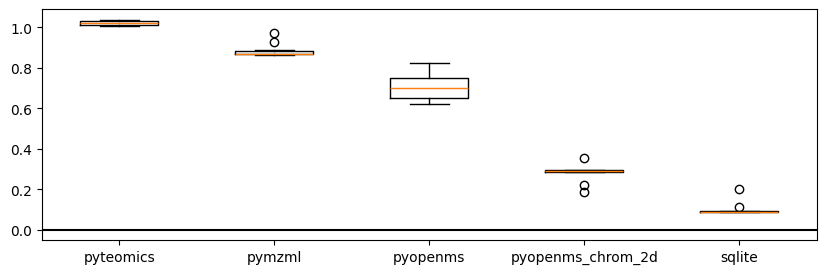

In [11]:
pyteomics_chrom = timeit.repeat('get_chrom_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pymzml_chrom = timeit.repeat('get_chrom_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pyopenms_chrom = timeit.repeat('get_chrom_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pyopenms_chrom_2d = timeit.repeat('get_chrom_mzml_pyopenms_2DPeak("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
sqlite_chrom = timeit.repeat('get_chrom_sqlite("../demo_data/180205_Poo_TruePoo_Full1.sqlite", 118.0865, 10)', globals=globals(), number=1, repeat=10)
plt.boxplot([pyteomics_chrom, pymzml_chrom, pyopenms_chrom, pyopenms_chrom_2d, sqlite_chrom], tick_labels=["pyteomics", "pymzml", "pyopenms", "pyopenms_chrom_2d", "sqlite"])
plt.axhline(y=0, color="k")
plt.show()

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


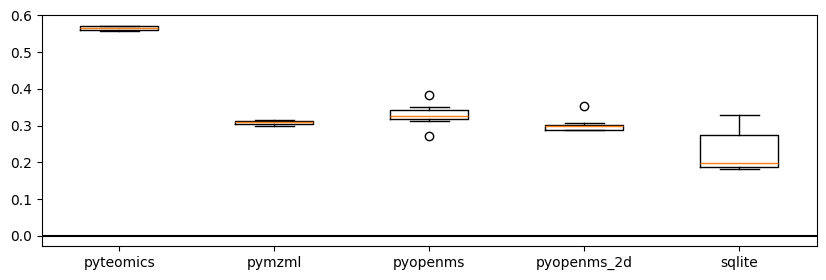

In [12]:
pyteomics_rtrange = timeit.repeat('get_rtrange_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pymzml_rtrange = timeit.repeat('get_rtrange_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pyopenms_rtrange = timeit.repeat('get_rtrange_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pyopenms_rtrange_2d = timeit.repeat('get_rtrange_mzml_pyopenms_2DPeak("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
sqlite_rtrange = timeit.repeat('get_rtrange_sqlite("../demo_data/180205_Poo_TruePoo_Full1.sqlite", 6.5, 8)', globals=globals(), number=1, repeat=10)
plt.boxplot([pyteomics_rtrange, pymzml_rtrange, pyopenms_rtrange, pyopenms_rtrange_2d, sqlite_rtrange], 
            tick_labels=["pyteomics", "pymzml", "pyopenms", "pyopenms_2d", "sqlite"])
plt.axhline(y=0, color="k")
plt.show()